## Imports and functions

In [1]:
%matplotlib inline
import matplotlib.pyplot as pyplot
import utils 
import Pass
import numpy as np
import glob
from Scratch import Scratch
from scipy.interpolate import interp1d    

## Read and display data for series 200 (GRIND)

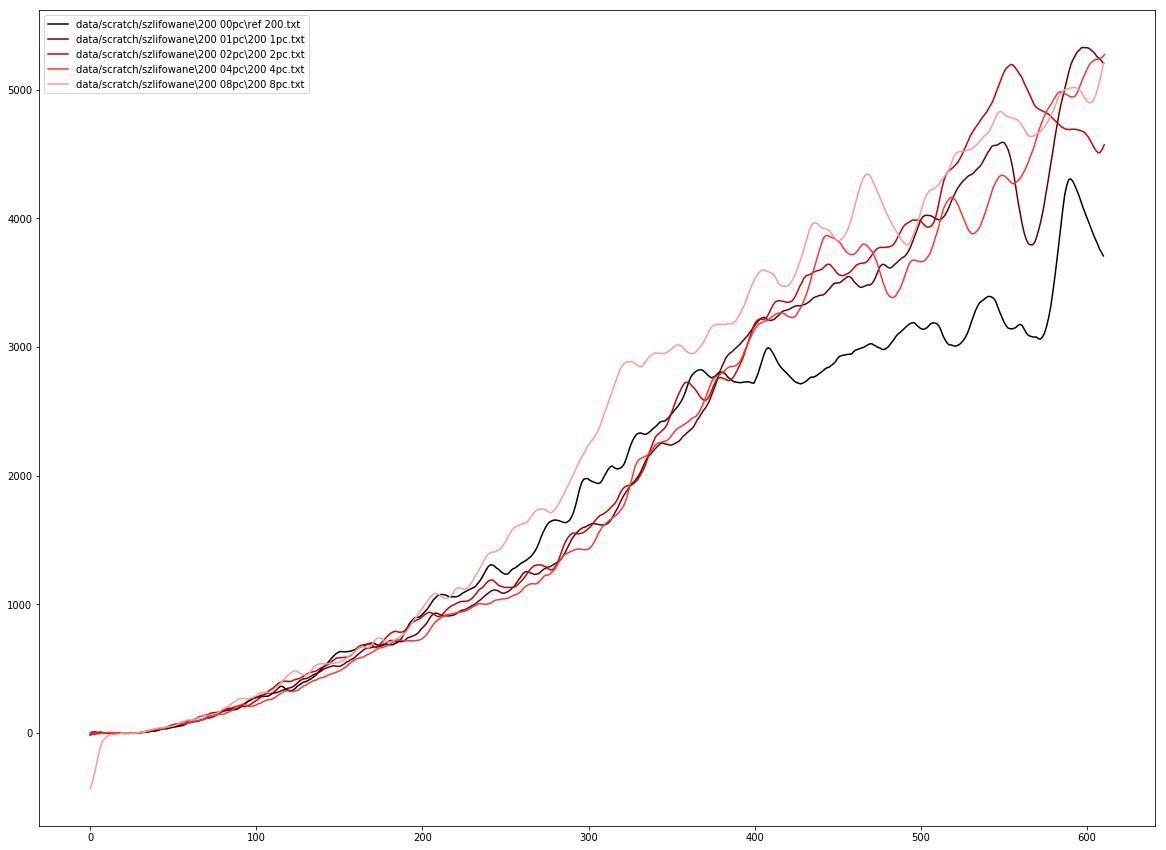

In [2]:
fileList = sorted(glob.glob('data/scratch/szlifowane/200*/*.txt'))
sampleList = [utils.read_data(file) for file in fileList]

fig = pyplot.figure(figsize=(20,15))
ax = fig.add_subplot(111)
utils.plot_scratch_samples(ax, sampleList, fileList, truncate=500)  


## Read and display data for sieries R7200 (GRIND)

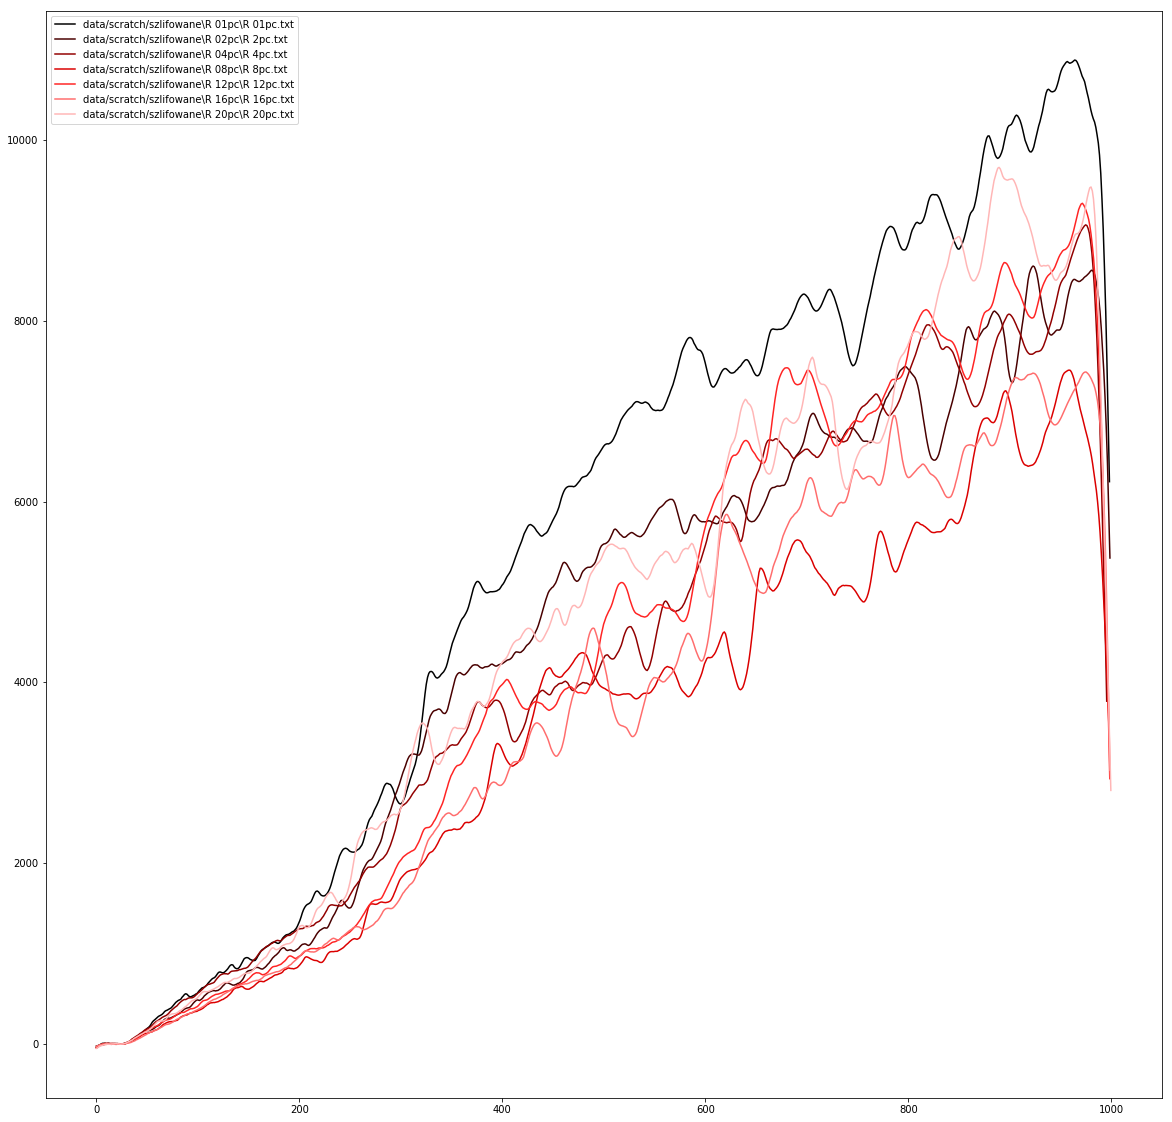

In [6]:
fileList = sorted(glob.glob('data/scratch/szlifowane/R*/*.txt'))
sampleList = [utils.read_data(file) for file in fileList]

fig = pyplot.figure(figsize=(20,20))
ax = fig.add_subplot(111)

utils.plot_scratch_samples(ax, sampleList, fileList, truncate=-1)  

## Read and display data for sieries R7200 (SURFACE)

In [4]:
fileList = sorted(glob.glob('data/scratch/szlifowane/R*/*.txt'))
sampleList = []
sampleList = [rd.read_data(file) for file in fileList]
siz = len(sampleList)

fig = pyplot.figure(figsize=(20,20))
ax = fig.add_subplot(111)
meanScratches = []
i = 0
for sample in sampleList:
    for scratch in sample:
        scratch.addBaseline()
        scratch.truncate(300)
        scratch.topo2.depth = scratch.topo2.depth - scratch.topo2.depth[20]
    meanScratches.append(Scratch.meanScratchList(sample))
    
    ax.plot(meanScratches[-1].scratch.distance, meanScratches[-1].topo2.depth, label=fileList[i], color = (i*0.05, 1-i*0.15, 0.99))
    i = i + 1
    
ax.legend(loc='upper left')

NameError: name 'rd' is not defined